In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2 Score:", R2)

MAE: 0.533200130495698
MSE: 0.5558915986952422
RMSE: 0.7455813830127749
R2 Score: 0.5757877060324524


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Dataset loaded successfully!")
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Dataset loaded successfully!
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


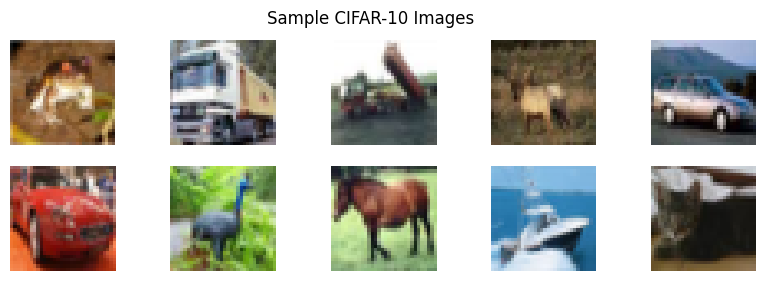

In [4]:
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.suptitle("Sample CIFAR-10 Images")
plt.show()


In [5]:
small_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
small_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_small = small_model.fit(
    x_train,y_train,
    epochs=5,
    validation_data=(x_test,y_test)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3783 - loss: 1.6961 - val_accuracy: 0.5858 - val_loss: 1.1772
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5983 - loss: 1.1501 - val_accuracy: 0.6408 - val_loss: 1.0402
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6581 - loss: 0.9848 - val_accuracy: 0.6551 - val_loss: 0.9953
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6936 - loss: 0.8840 - val_accuracy: 0.6697 - val_loss: 0.9640
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7164 - loss: 0.8176 - val_accuracy: 0.6905 - val_loss: 0.8995


In [6]:
big_model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
big_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history_big = big_model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.3636 - loss: 1.9962 - val_accuracy: 0.4564 - val_loss: 1.7799
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5940 - loss: 1.1720 - val_accuracy: 0.5544 - val_loss: 1.2960
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6715 - loss: 0.9696 - val_accuracy: 0.6740 - val_loss: 0.9770
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7238 - loss: 0.8257 - val_accuracy: 0.7427 - val_loss: 0.7739
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7587 - loss: 0.7235 - val_accuracy: 0.7782 - val_loss: 0.6896
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7871 - loss: 0.6395 - val_accuracy: 0.7898 - val_loss: 0.6386
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8098 - loss: 0.5615 - val_accuracy: 0.8173 - val_loss: 0.5585
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8257 -

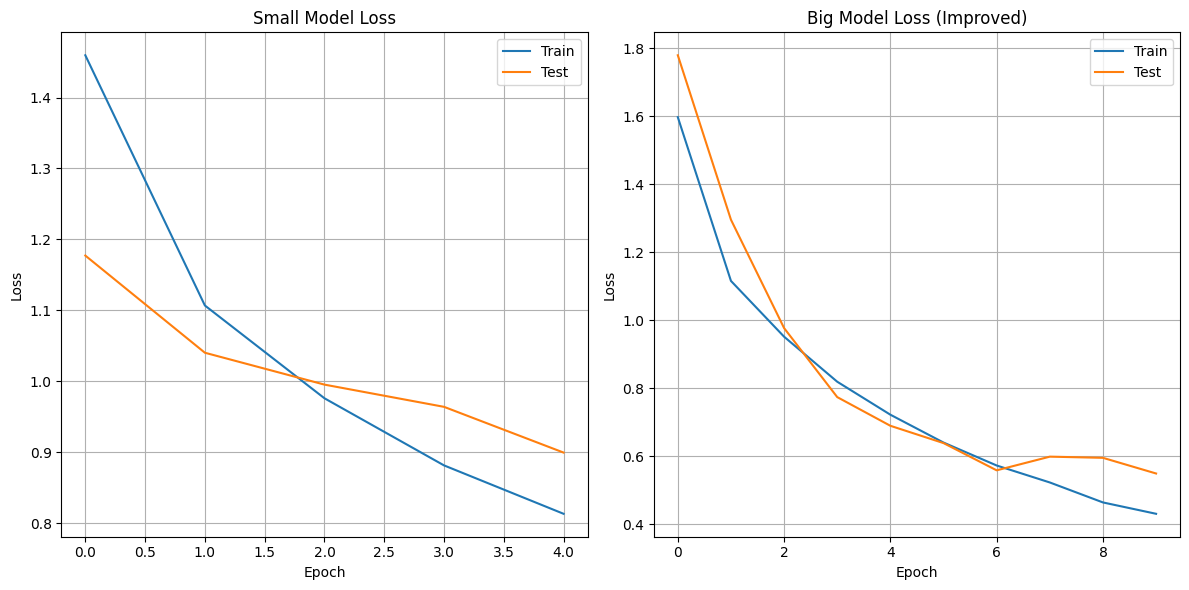

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_small.history['loss'])
plt.plot(history_small.history['val_loss'])
plt.title("Small Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_big.history['loss'])
plt.plot(history_big.history['val_loss'])
plt.title("Big Model Loss (Improved)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"])
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
train_loss, train_acc = big_model.evaluate(x_train,y_train)
test_loss, test_acc = big_model.evaluate(x_test,y_test)

print("Train accuracy:",train_acc)
print("Test accuracy:",test_acc)
print("Train loss:",train_loss)
print("Test loss:",test_loss)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9172 - loss: 0.2483
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8271 - loss: 0.5527
Train accuracy: 0.9154000282287598
Test accuracy: 0.8313000202178955
Train loss: 0.2508988678455353
Test loss: 0.5491780638694763
